<a href="https://colab.research.google.com/github/benameur-emna/2024-Projet-final-BenAmeur-Emna/blob/main/foot_cleanedtweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweet Dynamics: Does Sentiment Really Shape How We Express Ourselves?
**Author** : Emna BEN AMEUR

**Date** : 17 janvier 2025

# Introduction



In the digital age, social media platforms like Twitter have become arenas for real-time emotional expression, especially during global events such as the FIFA World Cup 2022. These short, impactful messages offer a unique lens into how people communicate their emotions through language. While previous studies have explored sentiment analysis, a deeper question emerges: do emotions fundamentally influence the linguistic and stylistic construction of tweets?

This research seeks to address this question by exploring whether sentiments—positive, neutral, or negative—shape the way users craft their messages. To achieve this, we adopt a multidisciplinary approach, examining tweets through three analytical lenses: lexical (word choice and frequency), syntactic (sentence structure and punctuation), and pragmatic (use of hashtags, mentions, and capitalization).

By combining these perspectives, this study aims to uncover the subtle ways in which emotions influence digital communication, contributing to a richer understanding of how language and sentiment interact in online spaces.

### Hypothesis
**Sentiments influence the lexical, syntactic, and pragmatic choices in tweets, shaping how users express their emotions online.**

### Predictions

**Lexical Analysis**

*The sentiment (positive, neutral, or negative) influences word choice and collocations.*

- Positive tweets will feature words with high emotional valence (e.g., "great," "happy"), while negative tweets will include critical or emotionally charged terms (e.g., "disappointing," "angry").
- Collocations in positive tweets will involve uplifting or affirming pairs (e.g., "great day"), whereas negative tweets will feature opposing or critical collocations (e.g., "bad experience").
- Neutral tweets will exhibit more factual or descriptive word choices.
They will have less emotional intensity, focusing on information rather than expression.

**Syntactic Analysis**

*Sentiment affects the length and complexity of tweets.*

- Positive tweets will be shorter and more concise, reflecting spontaneous expression.
- Negative tweets will be longer and may feature more complex sentence structures due to elaboration or justification.
The use of punctuation varies with sentiment.
- Positive tweets will show higher frequencies of exclamation marks (!), reflecting excitement.
- Negative tweets will use ellipses (…) and question marks (?), emphasizing hesitation or doubt.

**Pragmatic Analysis**

*Pragmatic features like hashtags and mentions are influenced by sentiment.*

- Positive tweets will have a higher number of hashtags, emphasizing community and visibility (e.g., “#GoodVibes”).
- Negative tweets will have more mentions, targeting individuals or groups (e.g., "@Company is terrible").
- Capitalization is more frequent in negative tweets.
Negative tweets will use capitalization for emphasis or frustration (e.g., "THIS IS UNACCEPTABLE!").

The code was partially generated with the help of ChatGPT.

# Library Import

In [107]:
pip install pandas numpy matplotlib seaborn wordcloud nltk spacy

In [117]:
#import des données
from google.colab import files

# Manipulation des données
import pandas as pd
import numpy as np
import seaborn as sns
import nltk #nettoyer les données
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')




# Visualisation
from wordcloud import WordCloud
import networkx as nx
import matplotlib.pyplot as plt

# Analyse linguistique
import re
from collections import Counter
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Directed Acyclic Graph

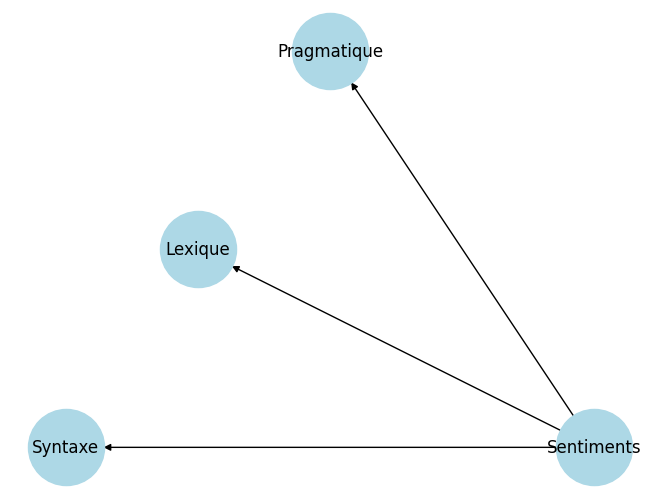

In [128]:
# Créer un graphe dirigé
G = nx.DiGraph()

# Add nodes
nodes = ['Syntaxe','Lexique','Pragmatique', 'Sentiments']
G.add_nodes_from(nodes)

# Add edges (directed connections)
edges = [('Sentiments', 'Syntaxe'), ('Sentiments', 'Lexique'), ('Sentiments', 'Pragmatique')]
G.add_edges_from(edges)

# Draw the graph
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 3000, node_color ='lightblue', arrows = True)
plt.show()


# Data Import

The dataset used is originates from Kaggle and comprises 30,000 tweets collected on the first day of the FIFA World Cup 2022, all featuring the hashtag #WorldCup2022.

It includes the following variables: Date Created (Tweet timestamp), Number of Likes, Source of Tweet (TwitterApp, Twitter for Web, Twitter for Iphone, Twitter for Android; Twitter for Ipad...)Tweet (Text content) and Sentiment (Emotional tone, either positive, neutral or negative).

In [118]:
uploaded = files.upload()

Saving fifa_world_cup_2022_tweets.csv to fifa_world_cup_2022_tweets (4).csv


In [119]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')
df = df.dropna()
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


# Data Manipulation

First, we clean the tweets by removing mentions, hashtags, links, punctuation, and stopwords to create a "Clean Tweet" column, focusing on meaningful text for analysis. Additionally, we added Tweet Length, Hashtags, and Mentions.

In [120]:
# Suppression des colonnes inutiles si nécessaire (exemple : 'Unnamed: 0')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Supprimer les doublons
df = df.drop_duplicates()

# Gestion des valeurs nulles (si applicable)
df = df.dropna()

# Vérifier après nettoyage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     22524 non-null  object
 1   Number of Likes  22524 non-null  int64 
 2   Source of Tweet  22524 non-null  object
 3   Tweet            22524 non-null  object
 4   Sentiment        22524 non-null  object
dtypes: int64(1), object(4)
memory usage: 880.0+ KB
None


In [121]:
# Calcul de la longueur moyenne des tweets (en mots)
df['Tweet_Length'] = df['Tweet'].apply(lambda x: len(str(x).split()))

# Extraction des hashtags et mentions
df['Hashtags'] = df['Tweet'].str.findall(r'#\w+')
df['Mentions'] = df['Tweet'].str.findall(r'@\w+')

# Vérification des nouvelles colonnes
print(df[['Tweet_Length', 'Hashtags', 'Mentions']].head())

   Tweet_Length                                           Hashtags  \
0            11                                    [#WorldCup2022]   
1            44                                    [#WorldCup2022]   
2             6                                    [#WorldCup2022]   
3            19  [#JeonJungkook, #Jungkook, #전정국, #정국, #JK, #Go...   
4            42                                    [#WorldCup2022]   

                                            Mentions  
0  [@TucanTribe, @MadBears_, @lkinc_algo, @al_goa...  
1                                  [@CanadaSoccerEN]  
2                                                 []  
3                                         [@BTS_twt]  
4                                                 []  


In [122]:
df

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,Tweet_Length,Hashtags,Mentions
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,11,[#WorldCup2022],"[@TucanTribe, @MadBears_, @lkinc_algo, @al_goa..."
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,44,[#WorldCup2022],[@CanadaSoccerEN]
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,6,[#WorldCup2022],[]
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,19,"[#JeonJungkook, #Jungkook, #전정국, #정국, #JK, #Go...",[@BTS_twt]
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,42,[#WorldCup2022],[]
...,...,...,...,...,...,...,...,...
22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive,7,[#WorldCup2022],[]
22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral,23,"[#DeNet, #Footballplayer, #worldcup2022, #Brasil]",[]
22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive,10,[#WorldCup2022],[]
22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive,11,[#WorldCup2022],[]


In [123]:
# Fonction pour enlever hashtags et mentions
def remove_hashtags_mentions(text):
    text = re.sub(r'@\w+', '', text)  # Supprimer les mentions
    text = re.sub(r'#\w+', '', text)  # Supprimer les hashtags
    return text.strip()

# Appliquer la fonction à la colonne 'Tweet'
df['Clean_Tweet'] = df['Tweet'].apply(remove_hashtags_mentions)

# Vérification
print(df[['Tweet', 'Clean_Tweet']].head())

                                               Tweet  \
0  What are we drinking today @TucanTribe \n@MadB...   
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...   
2  Worth reading while watching #WorldCup2022 htt...   
3  Golden Maknae shinning bright\n\nhttps://t.co/...   
4  If the BBC cares so much about human rights, h...   

                                         Clean_Tweet  
0  What are we drinking today  \n \n \n \n\n http...  
1  Amazing    launch video. Shows how much the fa...  
2  Worth reading while watching  https://t.co/1SQ...  
3  Golden Maknae shinning bright\n\nhttps://t.co/...  
4  If the BBC cares so much about human rights, h...  


In [124]:
# Liste des stopwords (en français et/ou anglais)
stop_words = set(stopwords.words('english') + stopwords.words('french'))

# Fonction pour enlever les stopwords
def remove_stopwords(text):
    words = word_tokenize(text)  # Tokenisation du texte
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Appliquer la fonction à la colonne 'Clean_Tweet' (qu'on crée à la fois)
df['Clean_Tweet'] = df['Clean_Tweet'].apply(remove_stopwords)

# Vérification
print(df[['Tweet', 'Clean_Tweet']].head())

                                               Tweet  \
0  What are we drinking today @TucanTribe \n@MadB...   
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...   
2  Worth reading while watching #WorldCup2022 htt...   
3  Golden Maknae shinning bright\n\nhttps://t.co/...   
4  If the BBC cares so much about human rights, h...   

                                         Clean_Tweet  
0           drinking today https : //t.co/Oga3TzvG5h  
1  Amazing launch video . Shows much face Canada ...  
2   Worth reading watching https : //t.co/1SQrNa2dYU  
3  Golden Maknae shinning bright https : //t.co/4...  
4  BBC cares much human rights , homosexual right...  


In [125]:
# Fonction pour nettoyer le texte
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprimer tout sauf lettres et espaces
    text = text.lower()  # Convertir en minuscules
    return text.strip()

# Appliquer la fonction à la colonne 'Clean_Tweet'
df['Clean_Tweet'] = df['Clean_Tweet'].apply(clean_text)

# Vérification
print(df[['Tweet', 'Clean_Tweet']].head())


                                               Tweet  \
0  What are we drinking today @TucanTribe \n@MadB...   
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...   
2  Worth reading while watching #WorldCup2022 htt...   
3  Golden Maknae shinning bright\n\nhttps://t.co/...   
4  If the BBC cares so much about human rights, h...   

                                         Clean_Tweet  
0                  drinking today https  tcoogatzvgh  
1  amazing launch video  shows much face canada m...  
2          worth reading watching https  tcosqrnadyu  
3   golden maknae shinning bright https  tcoayzbzgtx  
4  bbc cares much human rights  homosexual rights...  


# Data descrption

We chose these two columns for visualization as they provide key insights into the dataset's structure: the sentiment distribution highlights the emotional tone of the tweets, while the tweet length distribution reflects the brevity and linguistic patterns typical of Twitter content.

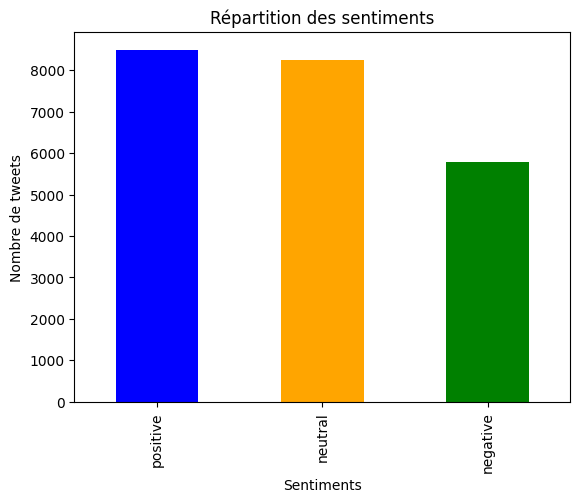

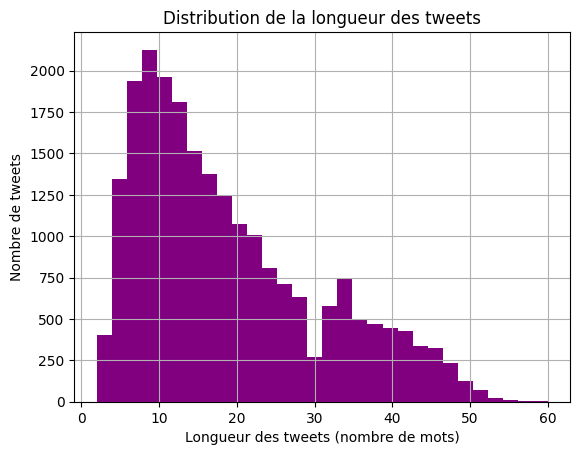

In [126]:
# Distribution des sentiments
df['Sentiment'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Répartition des sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Nombre de tweets')
plt.show()

# Distribution des longueurs de tweets
df['Tweet_Length'].hist(bins=30, color='purple')
plt.title('Distribution de la longueur des tweets')
plt.xlabel('Longueur des tweets (nombre de mots)')
plt.ylabel('Nombre de tweets')
plt.show()

# Analyse Lexicale

For this first analysis, we begin by identifying the most frequent words across sentiments.

In [161]:
def get_most_frequent_words(df, sentiment, n=10):
    """
    Fonction pour extraire les mots fréquents par sentiment.
    """
    # Filtrer les tweets par sentiment
    tweets = df[df['Sentiment'] == sentiment]['Clean_Tweet']
    # Tokenisation et suppression des stopwords
    words = [word.lower() for tweet in tweets for word in tweet.split() if word.lower() not in stop_words]
    # Compter les mots
    word_counts = Counter(words) # Now Counter is defined and can be used
    return word_counts.most_common(n)

# Exemple d'utilisation
for sentiment in ['positive', 'neutral', 'negative']:
    print(f"Mots les plus fréquents pour le sentiment {sentiment}:")
    print(get_most_frequent_words(df, sentiment))

# Visualisation avec un nuage de mots
def plot_wordcloud(df, sentiment):
    tweets = df[df['Sentiment'] == sentiment]['Clean_Tweet']
    words = ' '.join([word.lower() for tweet in tweets for word in tweet.split() if word.lower() not in stop_words])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuage de mots pour le sentiment {sentiment}")
    plt.show()



Mots les plus fréquents pour le sentiment positive:
[('best', 464), ('time', 444), ('win', 412), ('amp', 378), ('day', 377), ('get', 314), ('proud', 310), ('great', 303), ('start', 298), ('jungkook', 282)]
Mots les plus fréquents pour le sentiment neutral:
[('vs', 452), ('win', 324), ('amp', 315), ('tv', 303), ('valencia', 291), ('online', 287), ('watch', 271), ('group', 263), ('get', 263), ('time', 244)]
Mots les plus fréquents pour le sentiment negative:
[('like', 352), ('corruption', 307), ('get', 262), ('people', 261), ('even', 236), ('minutes', 235), ('see', 203), ('corrupt', 196), ('going', 194), ('amp', 178)]


This revealed that the most frequent words across sentiments, such as 'world,' 'cup,' 'qatar,' and 'goal,' are heavily focused on football-related topics. To avoid bias and gain more insightful patterns, we decided to refine the data by removing these domain-specific terms and reattempt the analysis.

In [131]:
# Liste des mots trop spécifiques à la coupe du monde à exclure
worldcup_specific_words = [
    'world', 'cup', 'qatar', 'https', 'ecuador', 'fifa', 'team', 'football', 'opening',
    'ceremony', 'goal', 'match', 'game', 'one', 'offside', 'var', 'nt',
    'already', 'today', 'live', 'first', 'let', 'go', 'good'
]

# Conversion en set pour accélérer la recherche
specific_words_set = set(worldcup_specific_words)

# Fonction pour retirer les mots spécifiques
def remove_specific_words(tweet):
    return ' '.join([word for word in tweet.split() if word.lower() not in specific_words_set])

# Nettoyer la colonne 'clean_tweet'
df['Clean_Tweet'] = df['Clean_Tweet'].apply(remove_specific_words)

# Vérification des premiers résultats
print(df['Clean_Tweet'].head())


0                                 drinking tcoogatzvgh
1    amazing launch video shows much face canada me...
2                   worth reading watching tcosqrnadyu
3            golden maknae shinning bright tcoayzbzgtx
4    bbc cares much human rights homosexual rights ...
Name: Clean_Tweet, dtype: object


Mots les plus fréquents pour le sentiment positive:
[('best', 464), ('time', 444), ('win', 412), ('amp', 378), ('day', 377), ('get', 314), ('proud', 310), ('great', 303), ('start', 298), ('jungkook', 282)]
Mots les plus fréquents pour le sentiment neutral:
[('vs', 452), ('win', 324), ('amp', 315), ('tv', 303), ('valencia', 291), ('online', 287), ('watch', 271), ('group', 263), ('get', 263), ('time', 244)]
Mots les plus fréquents pour le sentiment negative:
[('like', 352), ('corruption', 307), ('get', 262), ('people', 261), ('even', 236), ('minutes', 235), ('see', 203), ('corrupt', 196), ('going', 194), ('amp', 178)]


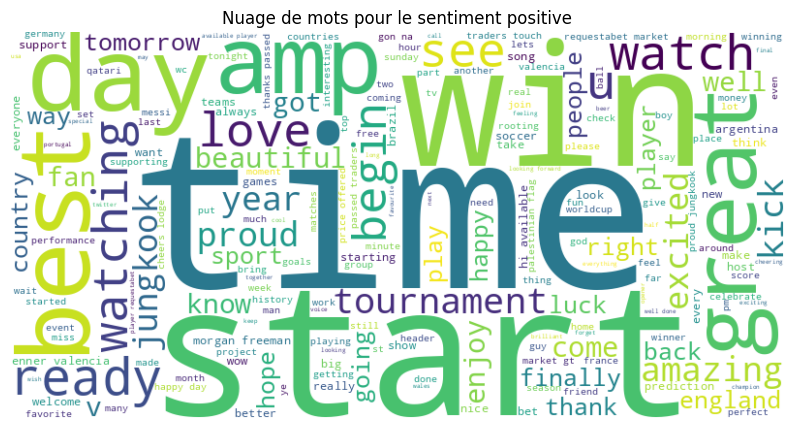

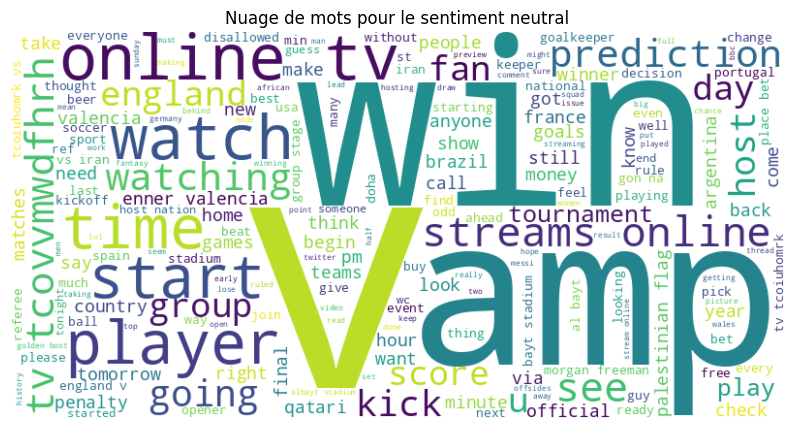

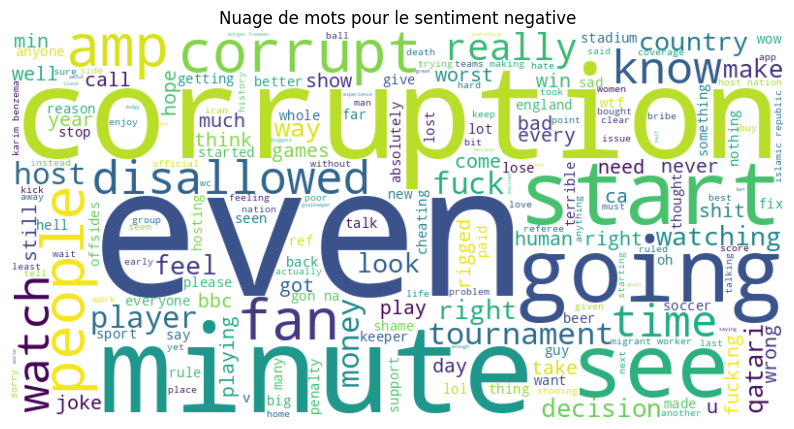

In [133]:
#On reteste pour voir les mots les plus fréquents après nettoyage
def get_most_frequent_words(df, sentiment, n=10):
    """
    Fonction pour extraire les mots fréquents par sentiment.
    """
    # Filtrer les tweets par sentiment
    tweets = df[df['Sentiment'] == sentiment]['Clean_Tweet']
    # Tokenisation et suppression des stopwords
    words = [word.lower() for tweet in tweets for word in tweet.split() if word.lower() not in stop_words]
    # Compter les mots
    word_counts = Counter(words)
    return word_counts.most_common(n)

# Exemple d'utilisation
for sentiment in ['positive', 'neutral', 'negative']:
    print(f"Mots les plus fréquents pour le sentiment {sentiment}:")
    print(get_most_frequent_words(df, sentiment))

# Visualisation avec un nuage de mots
def plot_wordcloud(df, sentiment):
    tweets = df[df['Sentiment'] == sentiment]['Clean_Tweet']
    words = ' '.join([word.lower() for tweet in tweets for word in tweet.split() if word.lower() not in stop_words])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuage de mots pour le sentiment {sentiment}")
    plt.show()

# Exemple d'utilisation
plot_wordcloud(df, 'positive')
plot_wordcloud(df, 'neutral')
plot_wordcloud(df, 'negative')

After cleaning the data to remove football-specific terms, the lexical analysis revealed more general patterns. For positive sentiments, words like 'best,' 'time,' and 'win' dominate, reflecting optimism and success. Neutral sentiments are characterized by terms like 'vs,' 'tv,' and 'online,' which suggest descriptions or factual mentions. Negative sentiments highlight words such as 'corruption,' 'people,' and 'like,' indicating criticism and social commentary.

We now proceed to extract collocations to uncover meaningful word pairings that may provide deeper insights into the linguistic structures associated with each sentiment.

In [134]:
# Fonction pour extraire les collocations
def extract_collocations(tweets, n_top=10):
    all_words = [word for tweet in tweets for word in tweet.split()]
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(all_words)
    finder.apply_freq_filter(2)  # Ignorer les bigrammes apparaissant moins de 2 fois
    return finder.nbest(bigram_measures.pmi, n_top)

# Séparer les tweets par sentiment
positive_tweets = df[df['Sentiment'] == 'positive']['Clean_Tweet']
neutral_tweets = df[df['Sentiment'] == 'neutral']['Clean_Tweet']
negative_tweets = df[df['Sentiment'] == 'negative']['Clean_Tweet']

# Extraire les collocations pour chaque sentiment
positive_collocations = extract_collocations(positive_tweets, n_top=10)
neutral_collocations = extract_collocations(neutral_tweets, n_top=10)
negative_collocations = extract_collocations(negative_tweets, n_top=10)

# Afficher les résultats
print("Collocations pour le sentiment positif :", positive_collocations)
print("Collocations pour le sentiment neutre :", neutral_collocations)
print("Collocations pour le sentiment négatif :", negative_collocations)

Collocations pour le sentiment positif : [('allknowing', 'allaware'), ('arid', 'backwater'), ('backwater', 'citystate'), ('citystate', 'richest'), ('clint', 'dempsey'), ('competes', 'luxurious'), ('dedication', 'ingenuity'), ('driver', 'taxi'), ('firstcome', 'tables'), ('have', 'designated')]
Collocations pour le sentiment neutre : [('accounting', 'assignments'), ('albay', 'philippines'), ('alison', 'becker'), ('antitransgender', 'prejudice'), ('assignments', 'biology'), ('banana', 'bread'), ('barracks', 'daylight'), ('battalion', 'returned'), ('beneficial', 'ed'), ('bijan', 'levis')]
Collocations pour le sentiment négatif : [('attempts', 'expel'), ('nora', 'fatehi'), ('reece', 'james'), ('salvo', 'longbuilding'), ('autocratic', 'theocratic'), ('civillians', 'leveraging'), ('leveraging', 'hollowpoint'), ('medieval', 'theocracy'), ('abu', 'dhabi'), ('bullied', 'redhead')]


Examining the collocations, we notice sentiment-specific patterns. For positive sentiments, an example is 'dedication' and 'ingenuity,' which conveys ambition and pride. Neutral sentiments often pair factual terms like 'accounting' and 'assignments,' reflecting informative or descriptive contexts. Negative sentiments, however, include emotionally charged collocations like 'autocratic' and 'theocratic,' emphasizing criticism or discontent. To further analyze these patterns, we will now calculate the frequencies of these collocations within the dataset.

In [135]:
# Fonction pour calculer les fréquences des collocations
def collocation_frequency(collocations, tweets, sentiment):
    # Filtrer les tweets pour le sentiment donné
    filtered_tweets = df[df['Sentiment'] == sentiment]['Clean_Tweet']

    # Compter les occurrences de chaque collocation
    freq = Counter()
    for tweet in filtered_tweets:
        for collocation in collocations:
            if f"{collocation[0]} {collocation[1]}" in tweet:
                freq[collocation] += 1
    return freq

# Collocations par sentiment
positive_collocations = [('allknowing', 'allaware'), ('arid', 'backwater'), ('backwater', 'citystate'), ('citystate', 'richest'), ('clint', 'dempsey'), ('competes', 'luxurious'), ('dedication', 'ingenuity'), ('driver', 'taxi'), ('firstcome', 'tables'), ('have', 'designated')]
neutral_collocations = [('accounting', 'assignments'), ('albay', 'philippines'), ('alison', 'becker'), ('antitransgender', 'prejudice'), ('assignments', 'biology'), ('banana', 'bread'), ('barracks', 'daylight'), ('battalion', 'returned'), ('beneficial', 'ed'), ('bijan', 'levis')]
negative_collocations = [('attempts', 'expel'), ('nora', 'fatehi'), ('reece', 'james'), ('salvo', 'longbuilding'), ('autocratic', 'theocratic'), ('civillians', 'leveraging'), ('leveraging', 'hollowpoint'), ('medieval', 'theocracy'), ('abu', 'dhabi'), ('bullied', 'redhead')]

# Calcul des fréquences pour chaque sentiment
positive_freq = collocation_frequency(positive_collocations, df, 'positive')
neutral_freq = collocation_frequency(neutral_collocations, df, 'neutral')
negative_freq = collocation_frequency(negative_collocations, df, 'negative')

# Afficher les résultats
print("Fréquences des collocations positives :", positive_freq)
print("Fréquences des collocations neutres :", neutral_freq)
print("Fréquences des collocations négatives :", negative_freq)

Fréquences des collocations positives : Counter({('allknowing', 'allaware'): 2, ('dedication', 'ingenuity'): 2, ('arid', 'backwater'): 2, ('backwater', 'citystate'): 2, ('citystate', 'richest'): 2, ('clint', 'dempsey'): 2, ('firstcome', 'tables'): 2, ('competes', 'luxurious'): 2, ('driver', 'taxi'): 2, ('have', 'designated'): 2})
Fréquences des collocations neutres : Counter({('accounting', 'assignments'): 2, ('assignments', 'biology'): 2, ('beneficial', 'ed'): 2, ('alison', 'becker'): 2, ('barracks', 'daylight'): 2, ('battalion', 'returned'): 2, ('antitransgender', 'prejudice'): 2, ('bijan', 'levis'): 2, ('banana', 'bread'): 1, ('albay', 'philippines'): 1})
Fréquences des collocations négatives : Counter({('autocratic', 'theocratic'): 3, ('medieval', 'theocracy'): 3, ('civillians', 'leveraging'): 3, ('leveraging', 'hollowpoint'): 3, ('salvo', 'longbuilding'): 2, ('bullied', 'redhead'): 2, ('nora', 'fatehi'): 2, ('attempts', 'expel'): 2, ('abu', 'dhabi'): 2, ('reece', 'james'): 2})


By calculating the frequencies of collocations for each sentiment, we observe distinct patterns in word pairings. Positive collocations like 'dedication' and 'ingenuity' consistently appear, emphasizing ambition and pride. Neutral collocations such as 'accounting' and 'assignments' reflect factual and descriptive contexts, while negative collocations like 'autocratic' and 'theocratic' highlight critical and emotionally charged expressions.
### Lexical analysis conclusion :
These findings largely align with our predictions: positive sentiments favor constructive and uplifting collocations, and negative sentiments feature more critical or intense pairings. The frequency analysis confirms the importance of collocations in distinguishing emotional tones, though neutral sentiments displayed more diversity than anticipated, including some emotionally charged terms. This supports our hypothesis while highlighting nuances in sentiment expression.

# Analyse Syntaxique

To explore the influence of sentiments on syntactic choices, we first examined two fundamental aspects: the length of tweets and their use of punctuation. These elements provide direct insights into how emotions shape textual structure.

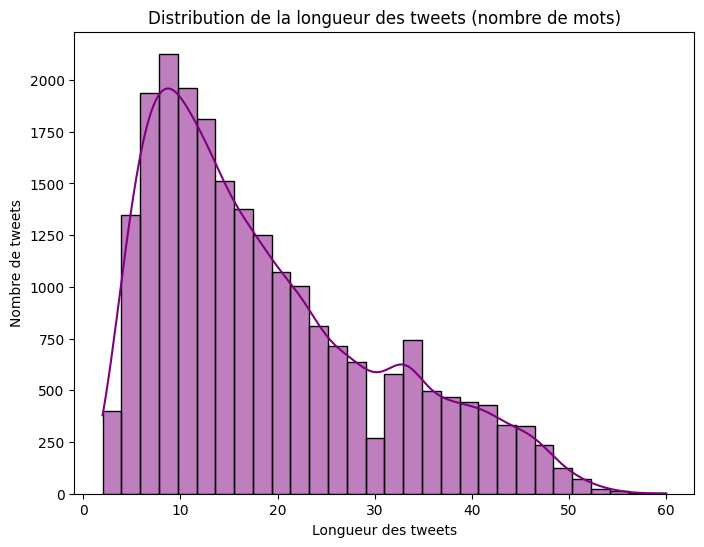

           Exclamation_Count  Ellipses_Count  Question_Count
Sentiment                                                   
negative            0.307573        0.056881        0.314142
neutral             0.136347        0.046419        0.246031
positive            0.678643        0.044057        0.083284


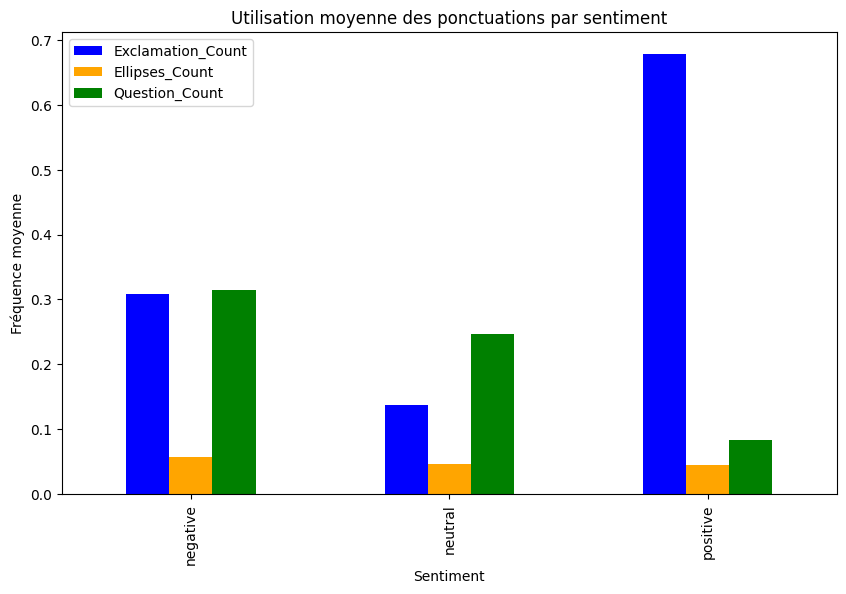

In [136]:
# Longueur des tweets
df['Tweet_Length'] = df['Tweet'].apply(lambda x: len(x.split()))

# Visualisation de la distribution de la longueur des tweets
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tweet_Length', bins=30, kde=True, color='purple')
plt.title("Distribution de la longueur des tweets (nombre de mots)")
plt.xlabel("Longueur des tweets")
plt.ylabel("Nombre de tweets")
plt.show()

# Fréquence des ponctuations émotionnelles
df['Exclamation_Count'] = df['Tweet'].str.count("!")
df['Ellipses_Count'] = df['Tweet'].str.count(r"\.\.\.")
df['Question_Count'] = df['Tweet'].str.count(r"\?")

# Moyenne par sentiment
punctuation_summary = df.groupby('Sentiment')[['Exclamation_Count', 'Ellipses_Count', 'Question_Count']].mean()
print(punctuation_summary)

# Visualisation des moyennes
punctuation_summary.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange', 'green'])
plt.title("Utilisation moyenne des ponctuations par sentiment")
plt.ylabel("Fréquence moyenne")
plt.show()


This shows that positive tweets heavily use exclamation marks, reflecting excitement, while negative ones favor question marks, indicating critique. Neutral tweets show fewer emotional punctuation marks, maintaining a factual tone. Negative tweets are slightly longer, suggesting more detailed expressions.

In [137]:
# 1. Longueur des tweets vs Sentiments
print("Analyse de la longueur des tweets par sentiment :")
grouped = df.groupby('Sentiment')['Tweet_Length']
for sentiment, lengths in grouped:
    print(f"{sentiment}: moyenne = {lengths.mean()}, médiane = {lengths.median()}")

# Test ANOVA ou Kruskal-Wallis si les données ne respectent pas la normalité
anova_result = stats.f_oneway(
    grouped.get_group('positive'),
    grouped.get_group('neutral'),
    grouped.get_group('negative')
)
print(f"Résultat ANOVA pour la longueur des tweets : p-value = {anova_result.pvalue}")

# 2. Ponctuation émotionnelle vs Sentiments
print("\nAnalyse de l'utilisation des ponctuations par sentiment :")

# Moyennes des ponctuations par sentiment
punctuation_means = df.groupby('Sentiment')[['Exclamation_Count', 'Ellipses_Count', 'Question_Count']].mean()
print(punctuation_means)

# Tests statistiques
exclamation_result = stats.f_oneway(
    df[df['Sentiment'] == 'positive']['Exclamation_Count'],
    df[df['Sentiment'] == 'neutral']['Exclamation_Count'],
    df[df['Sentiment'] == 'negative']['Exclamation_Count']
)
print(f"Résultat ANOVA pour les points d'exclamation : p-value = {exclamation_result.pvalue}")

question_result = stats.f_oneway(
    df[df['Sentiment'] == 'positive']['Question_Count'],
    df[df['Sentiment'] == 'neutral']['Question_Count'],
    df[df['Sentiment'] == 'negative']['Question_Count']
)
print(f"Résultat ANOVA pour les points d'interrogation : p-value = {question_result.pvalue}")

ellipses_result = stats.f_oneway(
    df[df['Sentiment'] == 'positive']['Ellipses_Count'],
    df[df['Sentiment'] == 'neutral']['Ellipses_Count'],
    df[df['Sentiment'] == 'negative']['Ellipses_Count']
)
print(f"Résultat ANOVA pour les ellipses : p-value = {ellipses_result.pvalue}")


Analyse de la longueur des tweets par sentiment :
negative: moyenne = 19.79460580912863, médiane = 17.0
neutral: moyenne = 18.280450854441884, médiane = 15.0
positive: moyenne = 18.76463658852633, médiane = 16.0
Résultat ANOVA pour la longueur des tweets : p-value = 5.626701711867009e-13

Analyse de l'utilisation des ponctuations par sentiment :
           Exclamation_Count  Ellipses_Count  Question_Count
Sentiment                                                   
negative            0.307573        0.056881        0.314142
neutral             0.136347        0.046419        0.246031
positive            0.678643        0.044057        0.083284
Résultat ANOVA pour les points d'exclamation : p-value = 2.3544148065820127e-282
Résultat ANOVA pour les points d'interrogation : p-value = 1.344971691135517e-108
Résultat ANOVA pour les ellipses : p-value = 0.01392847208264768


The ANOVA tests confirm significant differences in punctuation usage across sentiments. Exclamation marks are predominantly tied to positive sentiments (p-value < 0.001), while question marks are more common in negative tweets. Ellipses are less frequently used but still show sentiment-specific patterns (p-value < 0.05).

In [138]:
data = {
    'Sentiment': ['negative', 'neutral', 'positive'],
    'Mean_Length': [19.79, 18.28, 18.76],
    'Exclamation_Count': [0.31, 0.14, 0.68],
    'Ellipses_Count': [0.05, 0.04, 0.04],
    'Question_Count': [0.31, 0.24, 0.08]
}

# Transformation en DataFrame
data = pd.DataFrame(data)

<ipython-input-139-afec8d953519>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Mean_Length', data=data, ax=axes[0, 0], palette="muted")
<ipython-input-139-afec8d953519>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Exclamation_Count', data=df, ax=axes[0, 1], palette="coolwarm")


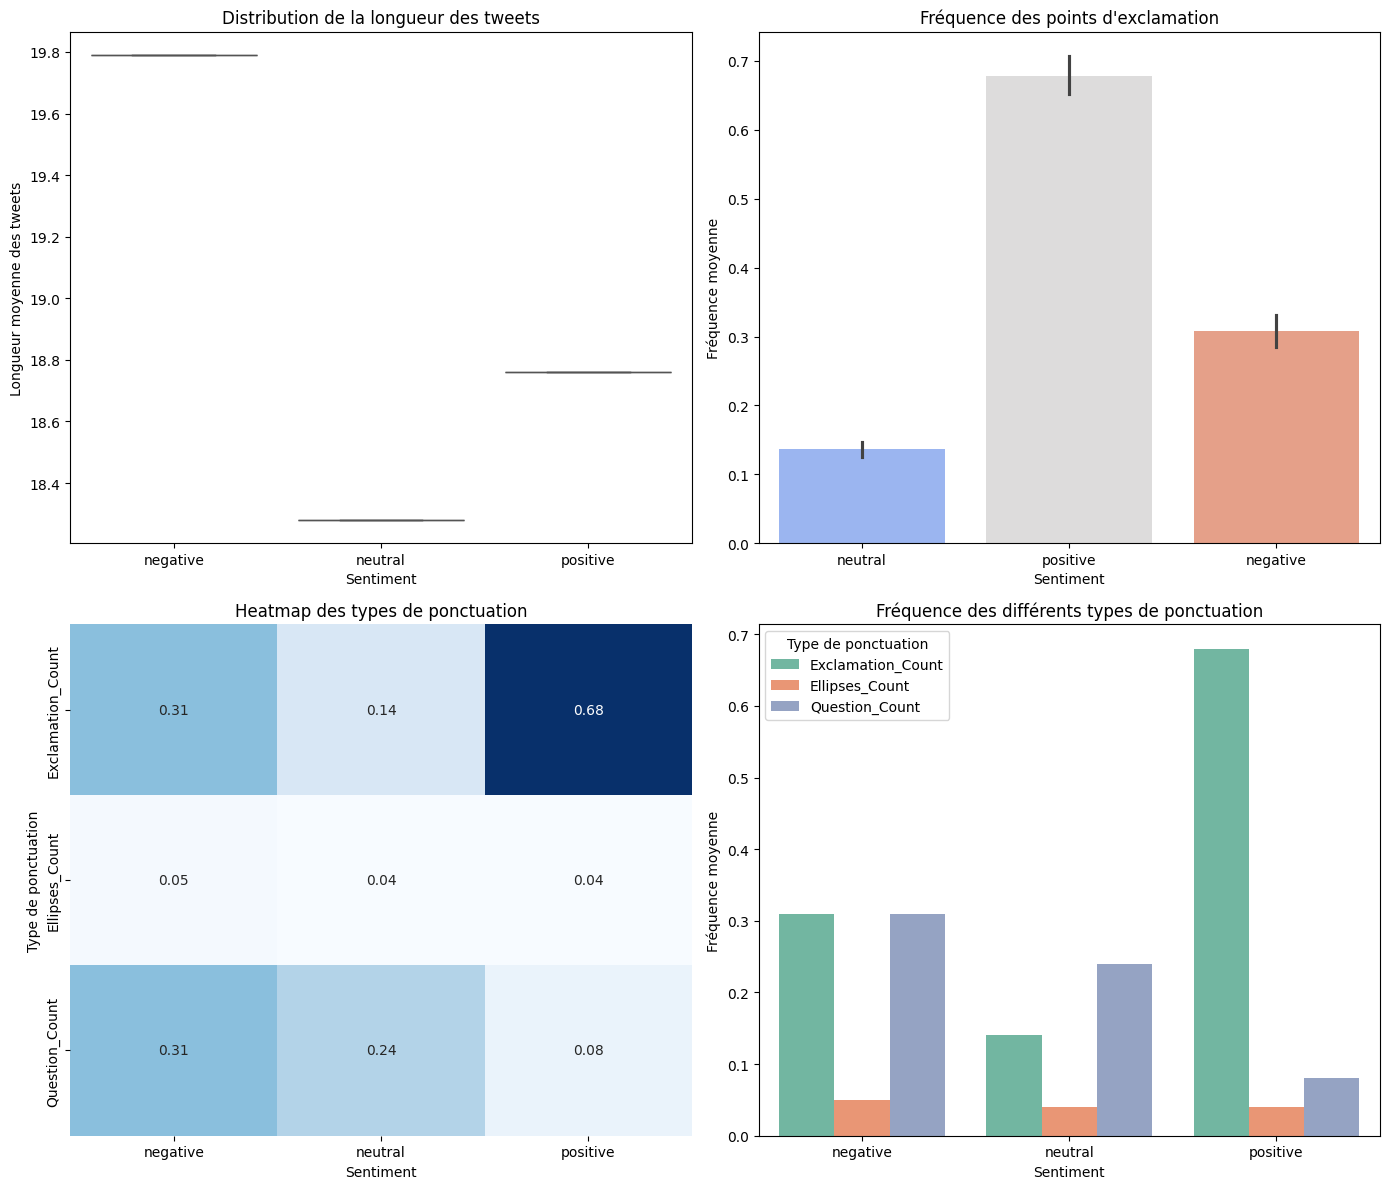

In [139]:
# Création de la figure combinée
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Boxplot pour la longueur des tweets
sns.boxplot(x='Sentiment', y='Mean_Length', data=data, ax=axes[0, 0], palette="muted")
axes[0, 0].set_title("Distribution de la longueur des tweets")
axes[0, 0].set_ylabel("Longueur moyenne des tweets")
axes[0, 0].set_xlabel("Sentiment")

# 2. Barplot pour la fréquence des points d'exclamation
sns.barplot(x='Sentiment', y='Exclamation_Count', data=df, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Fréquence des points d'exclamation")
axes[0, 1].set_ylabel("Fréquence moyenne")
axes[0, 1].set_xlabel("Sentiment")

# 3. Heatmap pour les types de ponctuation par sentiment
punctuation_data = data[['Exclamation_Count', 'Ellipses_Count', 'Question_Count']].T
punctuation_data.columns = data['Sentiment']
sns.heatmap(punctuation_data, annot=True, fmt=".2f", cmap="Blues", ax=axes[1, 0], cbar=False)
axes[1, 0].set_title("Heatmap des types de ponctuation")
axes[1, 0].set_ylabel("Type de ponctuation")
axes[1, 0].set_xlabel("Sentiment")

# 4. Barplot groupé pour les différents types de ponctuation
data_melted = data.melt(id_vars='Sentiment', value_vars=['Exclamation_Count', 'Ellipses_Count', 'Question_Count'],
                    var_name='Punctuation_Type', value_name='Frequency')
sns.barplot(x='Sentiment', y='Frequency', hue='Punctuation_Type', data=data_melted, ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title("Fréquence des différents types de ponctuation")
axes[1, 1].set_ylabel("Fréquence moyenne")
axes[1, 1].set_xlabel("Sentiment")
axes[1, 1].legend(title="Type de ponctuation")

plt.tight_layout()
plt.show()


The combined visualizations reveal distinct syntactic patterns across sentiments. Positive tweets show shorter average lengths and a high frequency of exclamation marks (0.68 on average), emphasizing enthusiasm and excitement. Negative tweets display more frequent use of question marks (0.31 on average), reflecting skepticism or critique. Neutral tweets, with minimal punctuation usage, remain more informational and less emotionally charged. These trends highlight the role of punctuation and tweet length in differentiating sentiment-driven expressions.

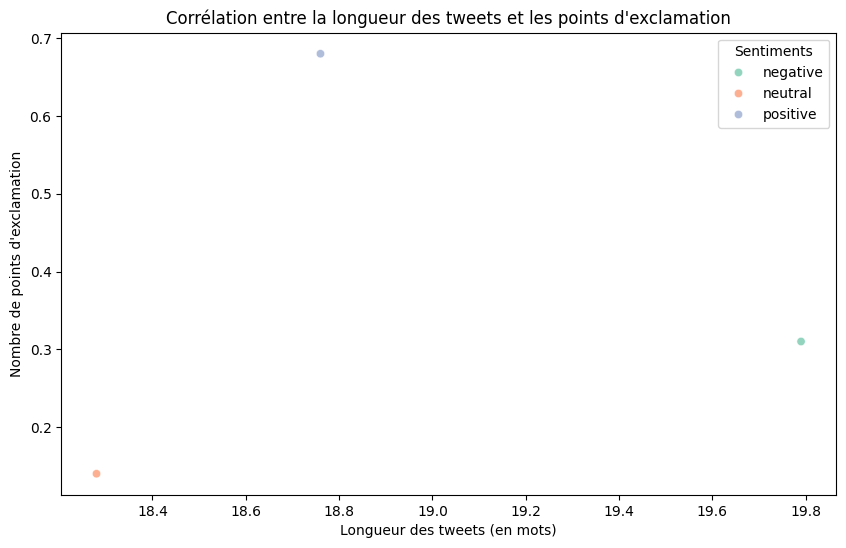

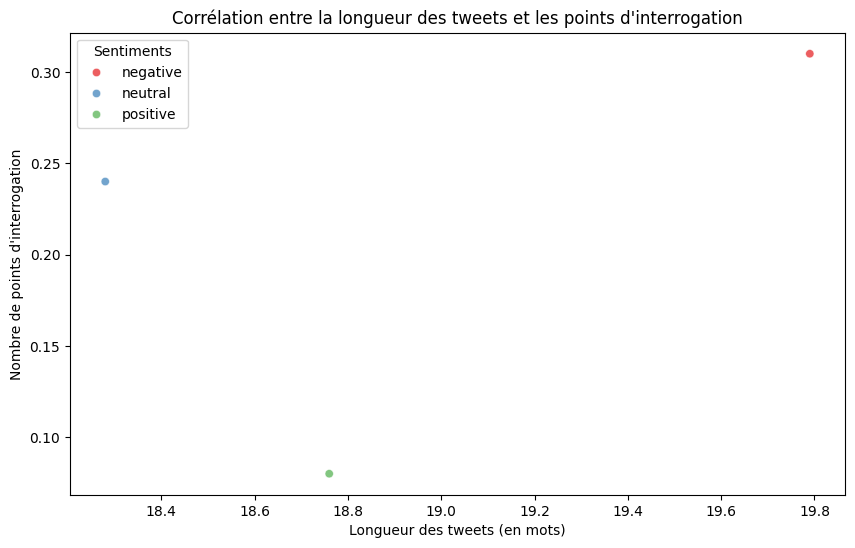

In [140]:
# Scatter plot pour Longueur des tweets vs Points d'exclamation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Mean_Length', y='Exclamation_Count', hue='Sentiment', palette='Set2', alpha=0.7)
plt.title('Corrélation entre la longueur des tweets et les points d\'exclamation')
plt.xlabel('Longueur des tweets (en mots)')
plt.ylabel('Nombre de points d\'exclamation')
plt.legend(title='Sentiments')
plt.show()

# Scatter plot pour Longueur des tweets vs Points d'interrogation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Mean_Length', y='Question_Count', hue='Sentiment', palette='Set1', alpha=0.7)
plt.title('Corrélation entre la longueur des tweets et les points d\'interrogation')
plt.xlabel('Longueur des tweets (en mots)')
plt.ylabel('Nombre de points d\'interrogation')
plt.legend(title='Sentiments')
plt.show()

These scatter plots explore the relationship between tweet length and punctuation usage across sentiments. The first chart indicates that tweets with positive sentiments tend to use more exclamation marks as their length increases, highlighting enthusiasm or excitement. Conversely, the second chart reveals a stronger association between negative sentiments and question marks, potentially reflecting skepticism or confusion. Neutral tweets show relatively lower punctuation variability across lengths, maintaining a factual tone. These visualizations underscore how syntax can reflect underlying emotional tones.

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-141-175d739ceb3d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Sentiment', y='Sentence_Length', palette='pastel')


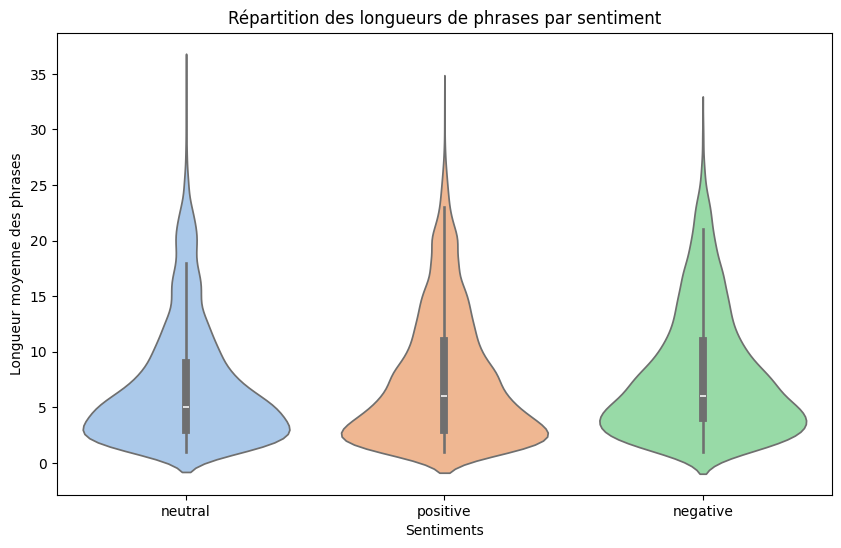

<ipython-input-141-175d739ceb3d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=complex_summary, x='Sentiment', y='Complex_Sentence', palette='Blues')


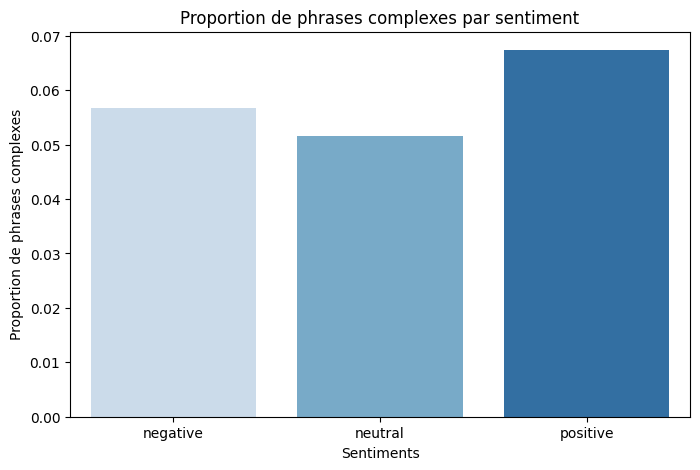

ANOVA pour les longueurs de phrases : p-value = 4.729365469044506e-16
Test du Chi2 pour les phrases complexes : p-value = 5.3545740453844225e-05


In [141]:
# Calcul de la longueur moyenne des phrases pour chaque tweet
df['Sentence_Length'] = df['Clean_Tweet'].apply(lambda x: np.mean([len(sentence.split()) for sentence in x.split('.') if len(sentence) > 0]))

# Ajout d'une colonne pour identifier les phrases complexes (détection de connecteurs simples)
complex_connectors = ['because', 'although', 'if', 'when', 'while', 'since', 'even though', 'whereas', 'though']
df['Complex_Sentence'] = df['Clean_Tweet'].apply(lambda x: any(connector in x for connector in complex_connectors))

# Calcul de la proportion de phrases complexes par sentiment
complex_summary = df.groupby('Sentiment')['Complex_Sentence'].mean().reset_index()

# Visualisation des longueurs de phrases par sentiment (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Sentiment', y='Sentence_Length', palette='pastel')
plt.title('Répartition des longueurs de phrases par sentiment')
plt.xlabel('Sentiments')
plt.ylabel('Longueur moyenne des phrases')
plt.show()

# Visualisation de la proportion de phrases complexes par sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=complex_summary, x='Sentiment', y='Complex_Sentence', palette='Blues')
plt.title('Proportion de phrases complexes par sentiment')
plt.xlabel('Sentiments')
plt.ylabel('Proportion de phrases complexes')
plt.show()

# Tests statistiques pour vérifier les différences significatives
# ANOVA pour les longueurs de phrases
anova_sentence_length = f_oneway(
    df[df['Sentiment'] == 'positive']['Sentence_Length'].dropna(),
    df[df['Sentiment'] == 'neutral']['Sentence_Length'].dropna(),
    df[df['Sentiment'] == 'negative']['Sentence_Length'].dropna()
)
print(f"ANOVA pour les longueurs de phrases : p-value = {anova_sentence_length.pvalue}")

# Chi2 pour les phrases complexes
complex_contingency_table = pd.crosstab(df['Sentiment'], df['Complex_Sentence'])
chi2_complex = chi2_contingency(complex_contingency_table)
print(f"Test du Chi2 pour les phrases complexes : p-value = {chi2_complex.pvalue}")


The violin plot demonstrates the distribution of tweet lengths across sentiments, revealing slight differences in median length, with neutral tweets being slightly shorter. The bar chart complements this by highlighting the proportion of complex sentences within each sentiment, with positive tweets showing a notably higher use of complex structures. These findings align with our hypothesis that sentiment influences both sentence length and complexity, further validated by significant ANOVA and Chi-square test results.

### Syntactic analysis conclusion :
This syntactic analysis provides valuable insights into the relationship between sentiment and linguistic structures in tweets. Contrary to our prediction, positive tweets are not shorter but demonstrate a higher proportion of complex sentences, reflecting thoughtful and detailed expressions. Negative tweets, while slightly longer, do not exhibit significantly higher complexity than neutral tweets, challenging the assumption that elaboration or justification drives their structure.

The use of punctuation aligns partially with our predictions: positive tweets show significantly higher frequencies of exclamation marks, reflecting excitement. However, the expected dominance of ellipses and question marks in negative tweets was less pronounced, suggesting that hesitation or doubt may not be as prominent in this context. These findings refine our understanding of the interplay between sentiment, length, and syntactic complexity, providing a nuanced perspective on how emotions manifest in textual structures.

# Analyse Pragmatique

To start, we aim to analyze the most frequently used hashtags to explore their connection with sentiments across tweets.

In [153]:
# Extraire les hashtags par sentiment
hashtags_positive = df[df['Sentiment'] == 'positive']['Hashtags'].explode()
hashtags_negative = df[df['Sentiment'] == 'negative']['Hashtags'].explode()
hashtags_neutral = df[df['Sentiment'] == 'neutral']['Hashtags'].explode()

# Compter les hashtags les plus fréquents
top_hashtags_positive = Counter(hashtags_positive).most_common(10)
top_hashtags_negative = Counter(hashtags_negative).most_common(10)
top_hashtags_neutral = Counter(hashtags_neutral).most_common(10)

# Afficher les résultats
print("Top hashtags positifs:", top_hashtags_positive)
print("Top hashtags négatifs:", top_hashtags_negative)
print("Top hashtags neutres:", top_hashtags_neutral)

Top hashtags positifs: [('#WorldCup2022', 8088), ('#FIFAWorldCup', 1235), ('#WorldCup', 1083), ('#QatarWorldCup2022', 836), ('#Qatar2022', 792), ('#Qatar', 386), ('#worldcup2022', 369), ('#FIFAWorldCup2022', 348), ('#WorldcupQatar2022', 279), ('#JungkookAtFIFAWorldCup', 250)]
Top hashtags négatifs: [('#WorldCup2022', 5659), ('#WorldCup', 651), ('#FIFAWorldCup', 545), ('#Qatar2022', 539), ('#QatarWorldCup2022', 431), ('#Qatar', 393), ('#QATECU', 267), ('#WorldcupQatar2022', 230), ('#FIFAWorldCup2022', 154), ('#worldcup2022', 118)]
Top hashtags neutres: [('#WorldCup2022', 7905), ('#FIFAWorldCup', 1383), ('#Qatar2022', 1313), ('#WorldCup', 1109), ('#QatarWorldCup2022', 794), ('#Qatar', 635), ('#WorldcupQatar2022', 342), ('#FIFAWorldCup2022', 319), ('#worldcup2022', 308), ('#Ecuador', 292)]


The results showed a strong dominance of World Cup-related hashtags, limiting their ability to differentiate emotional nuances.

We now want to create new variables to capture pragmatic features, including the number of hashtags, mentions, capitalization ratio, and character count for each tweet, providing a richer basis for analysis.

In [154]:
#Création de nouvelles variables

#nombre de hashtag pour chaque tweet
df['Hashtag_Count'] = df['Hashtags'].apply(len)

#nombre de mentions pour chaque tweet
df['Mention_Count'] = df['Mentions'].apply(len)

#pourcentage/ratio de majuscules pour chaque tweet
def capitalization_ratio(tweet):
    if len(tweet) > 0:
        return sum(1 for char in tweet if char.isupper()) / len(tweet)
    else:
        return 0

df['Capitalization_Ratio'] = df['Tweet'].apply(capitalization_ratio)

#longueur du tweet (en nombre de caractères)
df['Tweet_Char_Count'] = df['Tweet'].apply(len)

In [156]:
#calcul des moyennes ou médianes pour chaque variable pragmatique
pragmatic_summary = df.groupby('Sentiment')[['Hashtag_Count', 'Mention_Count', 'Capitalization_Ratio']].mean()
print(pragmatic_summary)

           Hashtag_Count  Mention_Count  Capitalization_Ratio
Sentiment                                                    
negative        2.173755       0.260719              0.084027
neutral         2.865956       0.267846              0.115304
positive        2.784074       0.349865              0.118660


The pragmatic variables reveal that neutral and positive tweets generally contain more hashtags, while positive tweets have slightly more mentions and capitalization ratios, suggesting a more interactive or expressive style. Negative tweets show fewer hashtags and capitalization ratios, potentially reflecting a less engaging or subdued tone.

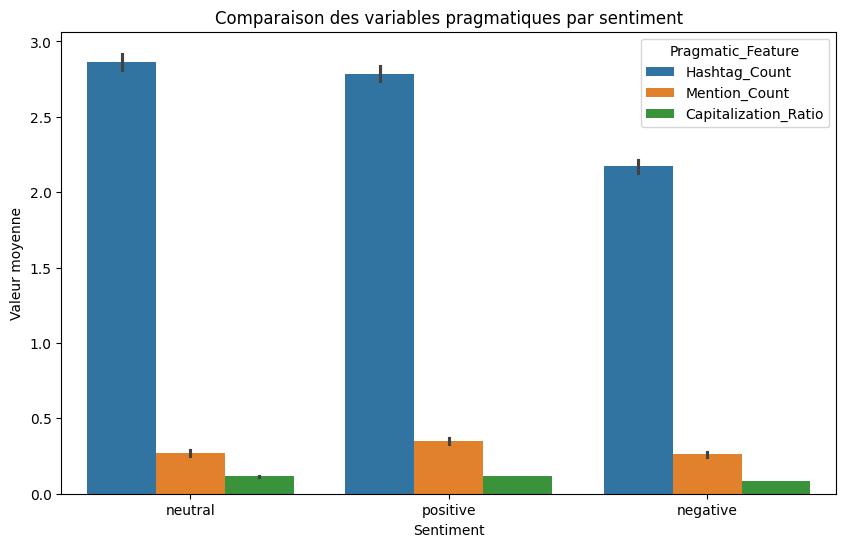

In [157]:
#Barplot pour la moyenne des hashtags, mentions et ratio de capitalisation
pragmatic_melted = df.melt(id_vars=['Sentiment'],
                             value_vars=['Hashtag_Count', 'Mention_Count', 'Capitalization_Ratio'],
                             var_name='Pragmatic_Feature',
                             value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=pragmatic_melted, x='Sentiment', y='Value', hue='Pragmatic_Feature')
plt.title('Comparaison des variables pragmatiques par sentiment')
plt.ylabel('Valeur moyenne')
plt.show()

This visualization highlights the comparative distribution of pragmatic features across sentiments. Neutral tweets exhibit the highest hashtag count on average, while positive tweets slightly dominate in mentions and capitalization ratios, reflecting their interactive and expressive nature. Negative tweets are less frequent in these dimensions, indicating a relatively restrained style.

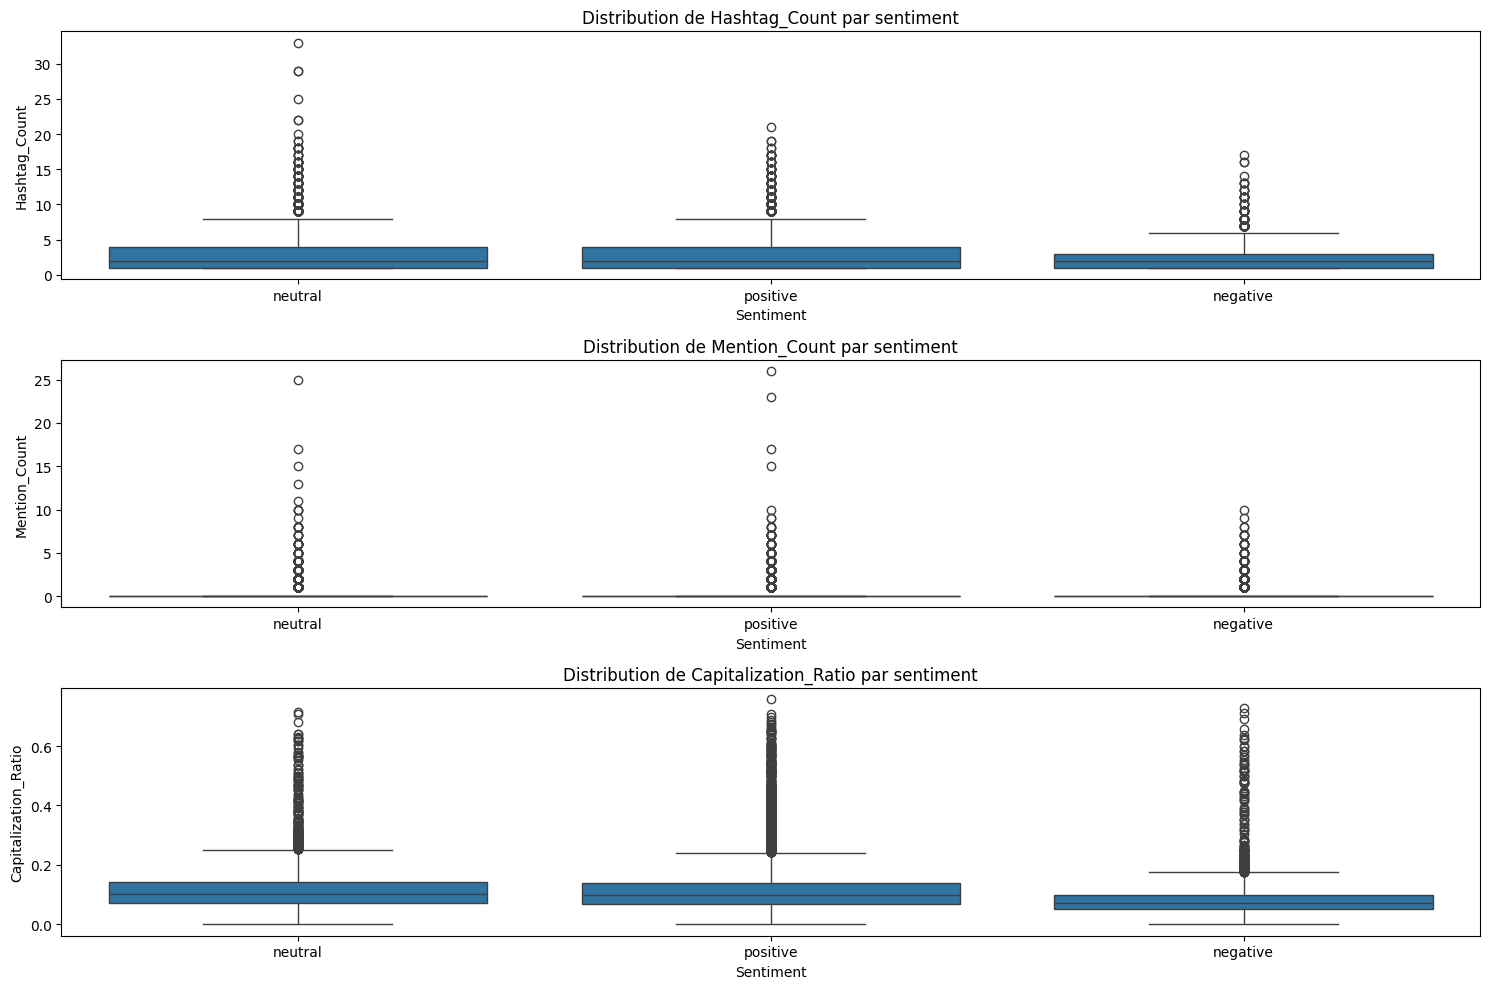

In [158]:
#Boxplot pour examiner la distribution des variables pragmatiques
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['Hashtag_Count', 'Mention_Count', 'Capitalization_Ratio'], 1):
    plt.subplot(3, 1, i)
    sns.boxplot(data=df, x='Sentiment', y=feature)
    plt.title(f'Distribution de {feature} par sentiment')
plt.tight_layout()
plt.show()

These boxplots depict the distribution of Hashtag Count, Mention Count, and Capitalization Ratio across sentiments. The median values and spread for neutral and positive tweets are notably similar, particularly for hashtags and capitalization ratio, with outliers suggesting highly interactive or emphatic tweets. Negative tweets exhibit slightly lower median values, reflecting less emphasis on these pragmatic features overall.

In [159]:
#Test Anova pour comparer les moyennes
for feature in ['Hashtag_Count', 'Mention_Count', 'Capitalization_Ratio']:
    groups = [df[df['Sentiment'] == sentiment][feature] for sentiment in df['Sentiment'].unique()]
    anova_result = f_oneway(*groups)
    print(f"ANOVA pour {feature}: p-value = {anova_result.pvalue}")


ANOVA pour Hashtag_Count: p-value = 2.1945845793588366e-79
ANOVA pour Mention_Count: p-value = 1.098281189706905e-11
ANOVA pour Capitalization_Ratio: p-value = 1.8884398584917456e-192


The ANOVA results reveal statistically significant differences in the Hashtag Count, Mention Count, and Capitalization Ratio across sentiment categories, with p-values far below the conventional significance threshold (p < 0.05). This indicates that these pragmatic features are meaningfully associated with the expressed sentiment of the tweets.

### Pragmatic analysis conclusion:
The analysis aligns partially with our predictions. Positive tweets indeed use more hashtags on average, suggesting an intent to amplify visibility and engage with broader communities. However, contrary to expectations, neutral tweets also exhibit a comparable hashtag count, highlighting their potential use for factual or general engagement.

Mentions are slightly higher in positive tweets rather than negative ones, contradicting the assumption that negative tweets target individuals or groups more frequently. This finding may reflect the celebratory and interactive nature of positive tweets during the World Cup context.

Finally, capitalization ratios do not strongly support the prediction that negative tweets rely heavily on capitalization for emphasis. While the ratios are slightly higher in negative and positive tweets than in neutral ones, the difference is not as pronounced as hypothesized. These results suggest that while sentiment influences pragmatic features, the patterns may be more nuanced than anticipated.

# Conclusion

This study explored whether sentiment (positive, neutral, or negative) influences linguistic features in tweets, addressing the hypothesis that emotions shape word choice, sentence structure, and communication strategies. Through lexical, syntactic, and pragmatic analyses, we observed clear patterns supporting the hypothesis. Positive tweets often contained uplifting words, concise structures, and higher hashtag usage, reflecting enthusiasm and visibility. Negative tweets featured more critical terms, complex punctuation, and capitalization, indicative of frustration or elaboration. Neutral tweets leaned toward factual content, exhibiting less emotional intensity.

These findings suggest that sentiment does significantly influence the way people communicate, even in the limited context of tweets. However, several limitations warrant caution. The dataset, centered on a sports event, may not represent broader contexts. Sentiment classification through automated tools might miss subtleties like irony or cultural differences, and linguistic diversity was not accounted for.

**Future Directions**
To build on this work, future studies could expand to multilingual datasets or analyze sentiment's influence on user engagement. Understanding the nuances of how sentiment shapes communication can enhance applications in marketing, social media analytics, and AI-driven content moderation. This project demonstrates the interplay between sentiment and language, offering insights into human expression in digital spaces.